Intensity vs Fermi Chopper frequency

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/SEQUOIA/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

# Exp data

In [5]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [6]:
# ls ..

In [7]:
expdata_all = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_All.dat'))

reading data. please wait...
  done


In [8]:
expdata_all.vdata

,#,RunNumber,Energy,Ei,chopper_choice,Chopper1,Chopper2,Chopper3,Height,FWHM,Sigma,Q
0,0.0,145160.0,2.0,2.007042,0.0,120.0,120.0,30.0,0.017237,0.028500,0.012102,0.435053
1,0.0,145161.0,3.0,3.012412,0.0,120.0,120.0,30.0,0.052395,0.057236,0.024304,0.532929
2,0.0,145162.0,4.0,4.018304,0.0,120.0,120.0,30.0,0.071759,0.085992,0.036515,0.615455
3,0.0,145163.0,5.0,5.025767,0.0,120.0,120.0,30.0,0.056265,0.120618,0.051218,0.688221
4,0.0,145164.0,6.0,5.633073,0.0,120.0,120.0,30.0,0.110947,0.125054,0.053102,0.738567
5,0.0,145165.0,7.0,7.040614,0.0,120.0,120.0,30.0,0.106029,0.178832,0.075937,0.814475
6,0.0,145166.0,8.0,8.047864,0.0,120.0,120.0,30.0,0.112967,0.218902,0.092952,0.870758
7,0.0,145167.0,9.0,9.042775,0.0,120.0,180.0,30.0,0.121579,0.179047,0.076028,0.923233
8,0.0,145168.0,10.0,10.050701,0.0,120.0,180.0,30.0,0.126550,0.213075,0.090478,0.973267
9,0.0,145169.0,12.0,12.064796,0.0,120.0,180.0,30.0,0.146165,0.275077,0.116806,1.066267


In [9]:
len(expdata_all.Ei_list)

56

<IPython.core.display.Javascript object>


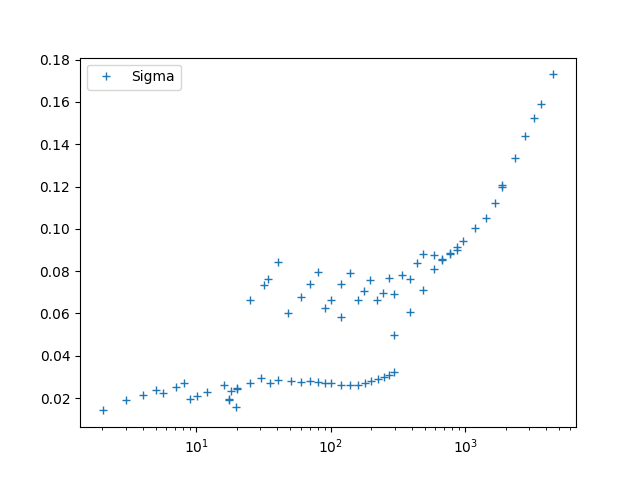

In [10]:
plt.figure()
plt.semilogx(expdata_all.vdata.Ei, expdata_all.FWHM/np.array(expdata_all.vdata.Ei),  "+")
plt.legend()

In [11]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

In [12]:
ishighres = expdata_all.vdata.chopper_choice==0
highres_Ei = expdata_all.vdata.Ei[ishighres]
highres_FWHM = expdata_all.vdata.FWHM[ishighres]
highres_int = expdata_all.intensity[ishighres]

In [13]:
ishighflux = expdata_all.vdata.chopper_choice==1
highflux_Ei = expdata_all.vdata.Ei[ishighflux]
highflux_FWHM = expdata_all.vdata.FWHM[ishighflux]
highflux_int = expdata_all.intensity[ishighflux]

<IPython.core.display.Javascript object>


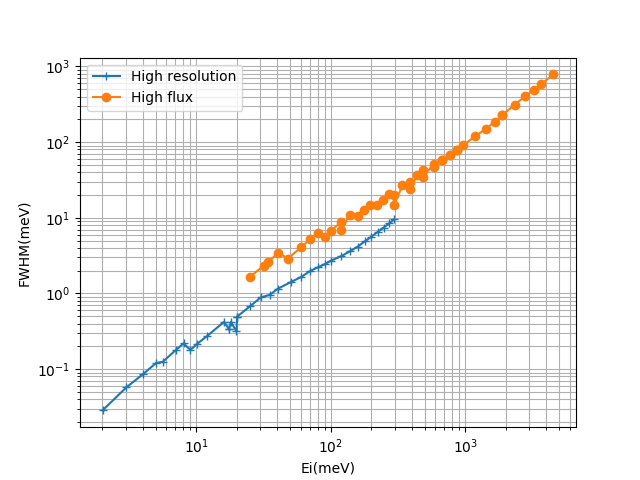

In [14]:
plt.figure()
x,y = sorted_xy_byx(highres_Ei, highres_FWHM)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(highflux_Ei, highflux_FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

<IPython.core.display.Javascript object>


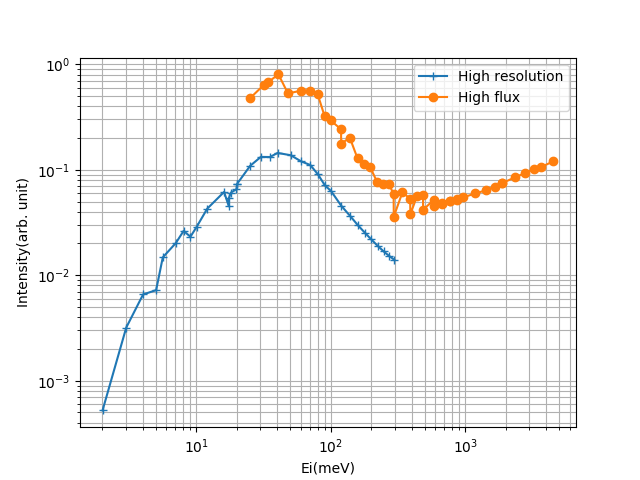

In [15]:
plt.figure()
x,y = sorted_xy_byx(highres_Ei, highres_int)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(highflux_Ei, highflux_int)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('Intensity(arb. unit)')
plt.legend()

# PyChop

In [16]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [17]:
from PyChop import PyChop2

In [18]:
import PyChop

In [19]:
instrument = PyChop2('./sequoia.yaml')

In [20]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

<IPython.core.display.Javascript object>


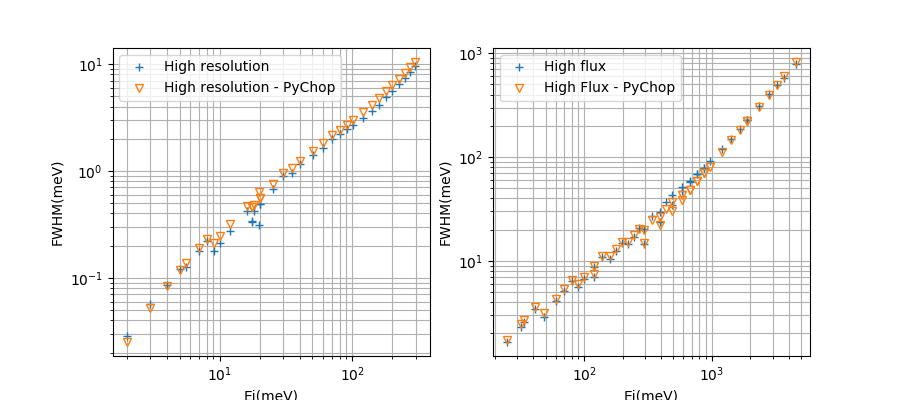

[0.02514287253984772, 0.052509146352149004, 0.08439840655865201, 0.11825308396208153, 0.1390679742464371, 0.18971692071482293, 0.22850492206156253, 0.21194146585835624, 0.2475889273250194, 0.3200340649172933, 0.629322050744467, 0.47250877303811656, 0.48133255434980937, 0.5562779503000753, 0.7478373243163579, 0.9496433364333993, 1.053876841130847, 1.249920644540115, 1.5393443503191397, 1.8141747295799433, 2.186981924202817, 2.4325261602468813, 2.659907890684673, 3.0092770707950005, 3.547344297144988, 4.168266813163705, 4.850848009332608, 5.559584632575272, 6.293176980961661, 7.254223380330996, 8.265273434795146, 9.326694878874209, 10.436040326281057, 0.4574171882482028, 0.45743590269303475, 0.5563971452170017]


In [88]:
instrument = PyChop2('./sequoia.yaml')

def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    return

fig, ax = plt.subplots(1, 2, figsize=(9,4))

x,y = expdata_all.vdata.Ei[ishighres], expdata_all.FWHM[ishighres]
freqs = expdata_all.chopper_freqs[ishighres]
ax[0].loglog(x,y, '+', label='High resolution')
# instrument.setChopper('Fine')
instrument.setChopper('SEQ-100-2.0-AST')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=__)[0][0] for _,__ in zip(x, freqs)]
print y_pychop
ax[0].loglog(x,y_pychop, 'v', mfc='none', label='High resolution - PyChop')
decorate(ax[0])

x,y = expdata_all.vdata.Ei[ishighflux], expdata_all.FWHM[ishighflux]
freqs = expdata_all.chopper_freqs[ishighflux]
ax[1].loglog(x,y, '+', label='High flux')
# instrument.setChopper('Sloppy')
instrument.setChopper('SEQ-700-3.5-AST')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=__)[0][0] for _,__ in zip(x, freqs)]
ax[1].loglog(x,y_pychop, 'v', mfc='none', label='High Flux - PyChop')
decorate(ax[1])


In [37]:
v =  8.314*(300.)/(10*101325)/6.022e23 * 1e30  # AA^3
print 1/v
xs = 5333. # barn
v/xs  # cm
mu_He3 = xs/v
from mcni.utils import conversion as Conv
pixelsize = 2.54 * .7
def deteff(E):
    v = Conv.e2v(E)
    return 1.-np.exp(-2200./v*mu_He3*pixelsize)
a = 3.03 # AA
xs = 5 # barn
mu_V = xs/a**3  # 1./cm
V_thickness = .9 #cm
def absorption(E):
    v = Conv.e2v(E)
    return np.exp(-2200./v*V_thickness*mu_V)
deteff(10)*absorption(10)

0.000244639222997


0.7538239283876864

<IPython.core.display.Javascript object>


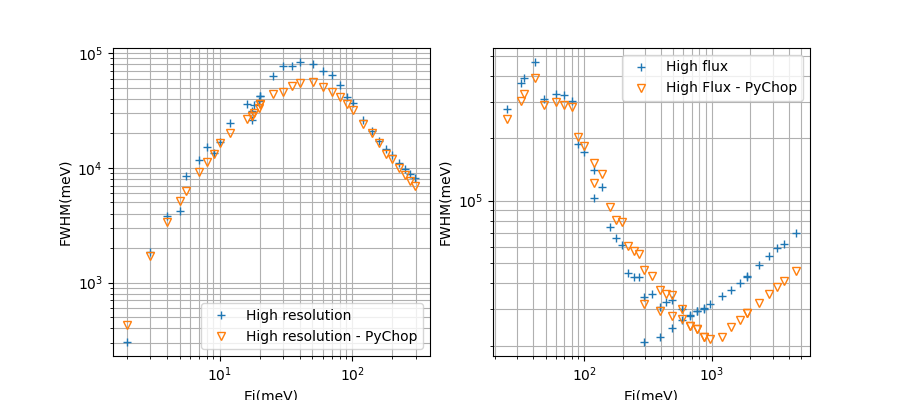

[426.87648662939336, 1711.7653450926432, 3347.566031419204, 5136.82381538162, 6236.288089304803, 9114.782227349082, 11202.270343998407, 13081.236051986762, 16372.231425878985, 20239.75952297554, 33465.47649334007, 26802.73502776305, 29848.54020423187, 36182.26905188943, 44484.24996517932, 45603.57495890285, 51713.45551278335, 54989.26446008216, 55822.771422973114, 50501.02607227577, 46210.09622771256, 41799.18844973151, 36251.64039448385, 32194.737148922202, 24181.320473017928, 20260.946029013605, 16577.208616682015, 13336.372051258353, 12027.392155550366, 10067.185893176007, 8645.12755257889, 7706.362782100444, 6972.253206369546, 28083.11786062108, 28084.420676852467, 36193.37709504257]


In [98]:
instrument = PyChop2('./sequoia.yaml')

fig, ax = plt.subplots(1, 2, figsize=(9,4))

x,y = expdata_all.vdata.Ei[ishighres], expdata_all.intensity[ishighres] * 580000
freqs = expdata_all.chopper_freqs[ishighres]
ax[0].loglog(x,y, '+', label='High resolution')
# instrument.setChopper('Fine')
instrument.setChopper('SEQ-100-2.0-AST')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=__)[1][0]*3*deteff(_)*absorption(_)*_ for _,__ in zip(x, freqs)]
print y_pychop
ax[0].loglog(x,y_pychop, 'v', mfc='none', label='High resolution - PyChop')
decorate(ax[0])

x,y = expdata_all.vdata.Ei[ishighflux], expdata_all.intensity[ishighflux] * 580000
freqs = expdata_all.chopper_freqs[ishighflux]
ax[1].loglog(x,y, '+', label='High flux')
# instrument.setChopper('Sloppy')
instrument.setChopper('SEQ-700-3.5-AST')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=__)[1][0]*3*deteff(_)*absorption(_)*_  for _,__ in zip(x, freqs)]
ax[1].loglog(x,y_pychop, 'v', mfc='none', label='High Flux - PyChop')
decorate(ax[1])


In [92]:
!diff sequoia.yaml sequoia-06212019.yaml

50c50
<           rho: 1435.0           # Chopper package curvature (mm)
---
>           rho: 1535.0           # Chopper package curvature (mm)
